# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import sys
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
sys.path.append('/home/chayan/NeuroMDAVIS/')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utills import Datasets as ds
from utills import NeuroMDAVIS as MV

# Loading Data

In [2]:
x1, x2, y = ds.LoadData('kotliarov50k')

In [3]:
# Colorcodes
c1 = list(np.unique(y['cell_type']))
c2=['blue', 'green', 'orange', 'red', 'yellow',
    'pink', 'purple', 'aquamarine', 'gray', 'violet',
    'cyan','lime', 'royalblue' , 'skyblue', 'olive',
    'tomato', 'saddlebrown', 'sienna', 'navy', 'darkgreen',
    'crimson', 'greenyellow','coral','burlywood','slategrey']
cols = map(lambda x: c2[c1.index(x)], y['cell_type'])
cs = [i for i in list(cols)]

# Applying NeuroMDAVIS

In [4]:
X_embedding = MV.NeuroMDAVIS([x1,x2], dim=2, lambda_act= 0.0001, lambda_weight= 0.00001, num_neuron=[32, [128, 64]],
                          bs=128, epoch=100, sd=0, verbose=1)

# saving the embedding
pd.DataFrame(X_embedding).to_csv('/home/chayan/NeuroMDAVIS/Data/Multi Omics/Embeddings/kotliarov50k_NeuroMDAVIS.csv')

Epoch 1/100
408/408 [==============================] - 7s 13ms/step - loss: 1.2360 - modality1_output_loss: 0.2378 - modality2_output_loss: 0.9945
Epoch 2/100
408/408 [==============================] - 5s 13ms/step - loss: 1.1904 - modality1_output_loss: 0.2336 - modality2_output_loss: 0.9539
Epoch 3/100
408/408 [==============================] - 5s 13ms/step - loss: 1.0095 - modality1_output_loss: 0.2185 - modality2_output_loss: 0.7867
Epoch 4/100
408/408 [==============================] - 5s 13ms/step - loss: 0.8940 - modality1_output_loss: 0.2101 - modality2_output_loss: 0.6788
Epoch 5/100
408/408 [==============================] - 5s 13ms/step - loss: 0.8462 - modality1_output_loss: 0.2066 - modality2_output_loss: 0.6340
Epoch 6/100
408/408 [==============================] - 5s 13ms/step - loss: 0.8249 - modality1_output_loss: 0.2054 - modality2_output_loss: 0.6135
Epoch 7/100
408/408 [==============================] - 5s 13ms/step - loss: 0.8062 - modality1_output_loss: 0.2046 - m

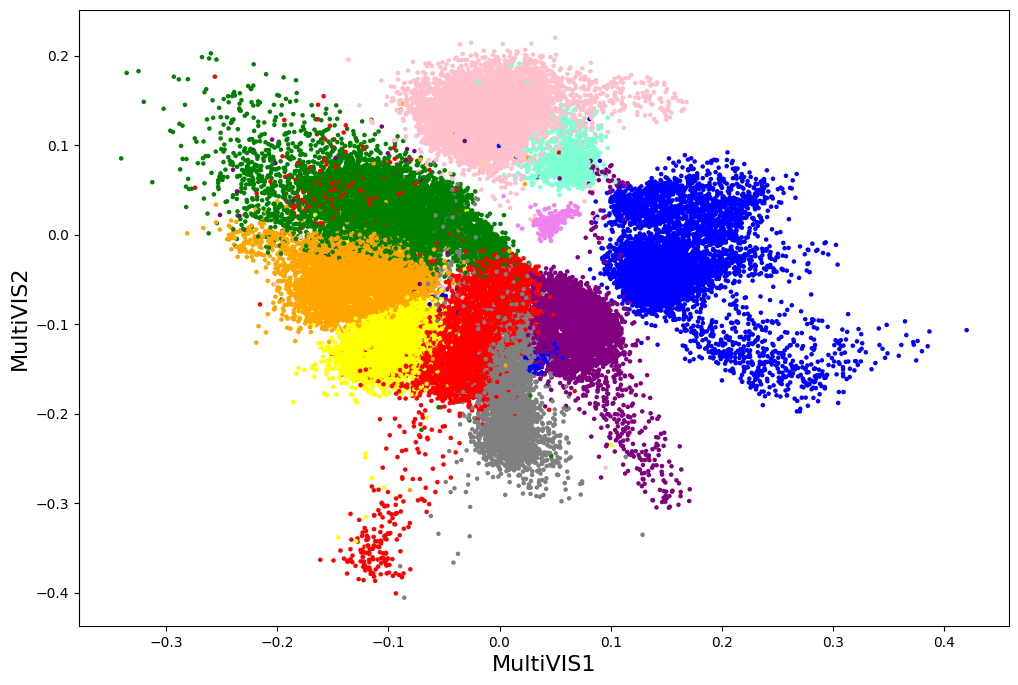

In [5]:
plt.figure(figsize=(12,8))
plt.scatter(X_embedding[:,0],X_embedding[:,1],c=cs,s=5)
plt.xlabel("MultiVIS1", fontsize=16)
plt.ylabel("MultiVIS2", fontsize=16)
plt.savefig('/home/chayan/NeuroMDAVIS/Results/Plots/kotliarov50k_NeuroMDAVIS.eps',
            dpi = 1200, format = 'eps')